# 0. 패키지 불러오기

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

- 분석의 목적
    - 신규자격/자격유지 검사 테스트 결과를 토대로 교통사고 위험군이 될 사람을 에측하는 AI모델 제작

# 1. 데이터 불러오기

## 가. EDA
- A(신규자격)
    - 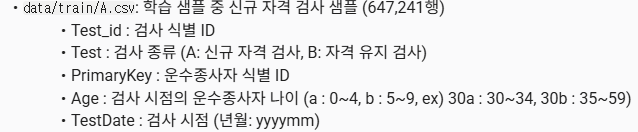
- B(자격유지)
    - 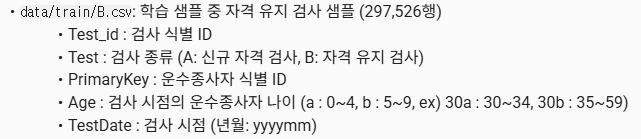

### 1) A검사(신규자격)
- 각 테스트 항목(A1, A2 등)마다 지정된 측정횟수가 존재
- 테스트 항목 컬럼에 데이터의 값이 ','구분 형태로 여러개의 원자값을 보유
    - AI활용을 위해 분해하거나 수치에 기반한 특정값으로 대체를 하는 등 데이터 가공 필요
- A1 ~ A7 측정항목 : 각 측정별 세부 측정항목이 있지만 대부분 조건등이 기록된 것이고, 실제 평가기준에 의거한 항목을 학습에 사용(ex : A1검사는 A1-3만 사용)
    - A1-3, A2-3, A3-5, A3-7, A4-3, A4-5, A5-2, A6-1, A7-1
- A8, A9 측정항목 : 정성적인 응답에 대한 정답 트리거 갯수 합산 또는 점수 계산으로 판단, 그대로 사용
    - A8-1 ~ 2, A9-1 ~ 
    
- 각 검사항목에 대해 단순히 합산 적용하지 말고, 반응횟수에 대한 평균 반응시간의 비율을 본다거나, A9 질문지형 검사에 대해 서로의 상관성 분석을 통해 측정항목에 대해 더하고 나누는 비율 조정으로 피처 엔지니어링을 추가적으로 수행

In [3]:
# A(신규자격) Train 데이터 확인
train_root_dir = './data/train'
train_a_df = pd.read_csv(os.path.join(train_root_dir, 'A.csv'))

In [4]:
train_a_df

Test_id Test  ... A9-4 A9-5
0       0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...    A  ...    6    5
1       0xEE79150381336B7C24837F15D2594C20E5558414BC08...    A  ...   20    6
2       0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...    A  ...    0    2
3       0xFD69864A378D41EA703014FA36A9261D864477A61F2C...    A  ...   17   13
4       0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...    A  ...   18    5
...                                                   ...  ...  ...  ...  ...
647236  0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...    A  ...    7    5
647237  0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...    A  ...    8    5
647238  0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...    A  ...    0    0
647239  0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...    A  ...    6    3
647240  0x8B5BFFB6E91F922F6A582B3DA824652D463EFD47B359...    A  ...   10    4

[647241 rows x 37 columns]

In [5]:
train_a_df.info()
# 데이터 647241개 중 일부 시험항목에 null값이 1개씩 없는것으로 확인
# 추후 처리 : 데이터의 수가 많아서 일괄 삭제해도 분석결과에 크게 영향 없을것으로 판단(but, 시간여유가 되면 대체방안에 대해서도 생각)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647241 entries, 0 to 647240
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     647241 non-null  object
 1   Test        647241 non-null  object
 2   PrimaryKey  647241 non-null  object
 3   Age         647241 non-null  object
 4   TestDate    647241 non-null  int64 
 5   A1-1        647241 non-null  object
 6   A1-2        647241 non-null  object
 7   A1-3        647241 non-null  object
 8   A1-4        647241 non-null  object
 9   A2-1        647241 non-null  object
 10  A2-2        647241 non-null  object
 11  A2-3        647241 non-null  object
 12  A2-4        647240 non-null  object
 13  A3-1        647240 non-null  object
 14  A3-2        647240 non-null  object
 15  A3-3        647240 non-null  object
 16  A3-4        647240 non-null  object
 17  A3-5        647240 non-null  object
 18  A3-6        647241 non-null  object
 19  A3-7        647240 non-

In [6]:
train_a_df.loc[train_a_df['A2-4'].isnull()==True,'A2-4']

426168    NaN
Name: A2-4, dtype: object

In [7]:
# train_a_df.iloc[426168]
print(train_a_df.iloc[426168,5:])
print("-"*100)
print(train_a_df.iloc[426168,5:].apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0))
# 각 시험항목별 데이터의 갯수는 각 시험측정에 필요한 지정되니 측정횟수(ex : a1시험 : 총 18회 측정)
# 일부 측정항목에서 null값이 1개씩 존재하는 것으로 확인

A1-1                  1,2,1,2,2,1,2,1,2,2,1,1,1,1,2,2,1,2
A1-2                  3,2,3,2,1,2,2,1,1,3,1,3,1,2,1,3,2,3
A1-3                  0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A1-4    14,-61,-54,638,-94,-29,-26,-50,-102,0,-118,-3,...
A2-1                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-2                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-3                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-4                                                  NaN
A3-1    1,2,2,2,1,2,2,2,1,2,1,2,2,1,1,2,2,2,1,1,1,1,1,...
A3-2    8,5,3,7,6,1,3,3,8,1,2,7,5,6,8,7,7,5,4,2,4,4,8,...
A3-3    2,2,2,1,2,2,1,2,1,1,2,2,1,2,2,1,2,1,2,2,2,1,1,...
A3-4    8,5,3,7,6,1,3,2,8,1,4,7,5,7,8,7,2,4,4,7,4,4,8,...
A3-5    1,1,1,1,1,1,1,3,1,1,3,1,1,3,1,1,3,3,1,3,1,1,1,...
A3-6    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
A3-7    1250,2135,1167,733,1518,2402,1668,1368,1818,20...
A4-1    2,2,2,2,2,1,2,1,1,2,2,2,2,1,1,1,1,1,1,2,1,1,2,...
A4-2    2,1,1,1,2,1,2,1,1,2,2,1,1,2,1,1,1,2,1,1,1,2,1,...
A4-3    1,1,1,

In [8]:
print(train_a_df['A1-3'])
print("-"*100)
print(train_a_df['A2-3'])

0         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1         1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                         ...                 
647236    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647237    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647238    0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1
647239    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647240    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Name: A1-3, Length: 647241, dtype: object
----------------------------------------------------------------------------------------------------
0         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                         ...                 
647236    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647237    0,0,0,0,0,0,0,0,0,0

In [9]:
print(train_a_df['A8-1'])
print("-"*100)
print(train_a_df['A9-1'])

0         6
1         8
2         0
3         7
4         3
         ..
647236    1
647237    6
647238    0
647239    7
647240    6
Name: A8-1, Length: 647241, dtype: int64
----------------------------------------------------------------------------------------------------
0          4
1          9
2          6
3         21
4          6
          ..
647236     9
647237     4
647238     0
647239     4
647240     6
Name: A9-1, Length: 647241, dtype: int64


### 2) B검사(자격유지) 
- A검사와 마찬가지로 각 테스트 항목마다 지정된 측정횟수가 존재
- 테스트 항목 컬럼에 데이터의 값이 ','구분 형태로 여러개의 원자값을 보유
    - AI활용을 위해 분해하거나 수치에 기반한 특정값으로 대체를 하는 등 데이터 가공 필요
- B1, B2 측정 : 정/오 응답 갯수 사용(B1-1, B1-3, B2-1, B2-3)
- B3 측정 : B3-1(정답갯수), B3-2(반응시간 평균)
- B4 측정 : B4-1(정답갯수) 
- B5 ~ B8 측정 : 정/오 정답만(B5-1, B6, B7, B8)
- B9, B10 측정 : '7'에 버튼을 누른 횟수와 장애물에 부딪히지 않은 횟수, 색깔에 맞춰 동일한 색 버튼을 누른 횟수 등 정답에 초점을 둘지 오답에 초점을 둘지 생각해볼 문제


In [10]:
# B(자격유지) Train 데이터 확인
train_root_dir = './data/train'
train_b_df = pd.read_csv(os.path.join(train_root_dir, 'B.csv'))

In [11]:
train_b_df

Test_id Test  ... B10-5 B10-6
0       0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...    B  ...     7    15
1       0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...    B  ...    10    19
2       0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...    B  ...     5    19
3       0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...    B  ...     4    20
4       0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...    B  ...    14    20
...                                                   ...  ...  ...   ...   ...
297521  0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...    B  ...     2    20
297522  0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...    B  ...     1    20
297523  0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...    B  ...     0    20
297524  0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...    B  ...     0    19
297525  0xC803D4A928C06260BA4A4B164C6AA9C5C9938BF874DB...    B  ...     7    19

[297526 rows x 31 columns]

In [12]:
train_b_df.info()
# 마찬가지로 전체 297526개 데이터 중 특정 시험에서 결측치 값이 보임
# A검사와 다르게 결측치 값이 1개 보다 더 많은 측정항목이 보여 전체적으로 어느정도 데이터가 부족한지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     297526 non-null  object
 1   Test        297526 non-null  object
 2   PrimaryKey  297526 non-null  object
 3   Age         297526 non-null  object
 4   TestDate    297526 non-null  int64 
 5   B1-1        297517 non-null  object
 6   B1-2        297517 non-null  object
 7   B1-3        297517 non-null  object
 8   B2-1        297523 non-null  object
 9   B2-2        297523 non-null  object
 10  B2-3        297523 non-null  object
 11  B3-1        297523 non-null  object
 12  B3-2        297523 non-null  object
 13  B4-1        297523 non-null  object
 14  B4-2        297523 non-null  object
 15  B5-1        297523 non-null  object
 16  B5-2        297523 non-null  object
 17  B6          297523 non-null  object
 18  B7          297524 non-null  object
 19  B8          297525 non-

In [13]:
train_b_test = train_b_df.T.iloc[5:,:]
train_b_test.apply(lambda row : row.isnull().sum(), axis = 1)
# 각 측정항목별 결측치 확인

B1-1     9
B1-2     9
B1-3     9
B2-1     3
B2-2     3
B2-3     3
B3-1     3
B3-2     3
B4-1     3
B4-2     3
B5-1     3
B5-2     3
B6       3
B7       2
B8       1
B9-1     0
B9-2     0
B9-3     0
B9-4     0
B9-5     0
B10-1    0
B10-2    0
B10-3    0
B10-4    0
B10-5    0
B10-6    0
dtype: int64

In [14]:
print(train_b_df['B1-1'][0])
print("-"*100)
print(train_b_df['B1-3'][0])

1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
----------------------------------------------------------------------------------------------------
3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4


In [15]:
# B3는 반응시간도 중요함
print(train_b_df['B3-2'][0])
print("-"*100)
print(train_b_df['B4-1'][2], " / 갯수:", len(train_b_df['B4-1'][2]))

0.8169604,0.9480587,0.8458152,0.9181027,0.9304094,0.7811799,0.8138167,0.7461151,0.9210144,0.7461294,0.7942742,0.8164628,0.8533937,0.8852984,0.7833536
----------------------------------------------------------------------------------------------------
5,3,1,3,1,3,3,1,3,5,1,1,1,1,1,5,5,3,1,5,1,1,1,5,3,1,3,3,5,1,3,1,1,5,1,1,1,1,3,3,5,5,3,5,3,1,1,1,5,5,1,1,1,1,3,1,5,5,1,1  / 갯수: 119


In [16]:
# B4의 시도횟수는 60회인데 왜 119개의 데이터가 있을까? ','를 포함해서 119개였다. 실제로는 60개가 맞음
test_a = train_b_df['B4-1'][0]
print(len([i for i in test_a.split(',') if int(i) in(1, 2)]))
print([i for i in test_a.split(',') if int(i) in(1, 2)])
print("-"*100)
print(len([i for i in test_a.split(',') if int(i) in(3, 4, 5, 6)]))
print([i for i in test_a.split(',') if int(i) in(3, 4, 5, 6)])
print("-"*100)

30
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1']
----------------------------------------------------------------------------------------------------
30
['5', '5', '3', '3', '3', '3', '5', '5', '6', '5', '3', '3', '3', '5', '5', '3', '3', '3', '5', '5', '4', '5', '3', '3', '5', '5', '3', '6', '6', '3']
----------------------------------------------------------------------------------------------------


In [17]:
print(train_b_df['B9-1']) # aud, hit : 아마도 숫자 '7'이 15번 나오는 동안 제대로 버튼 누른 횟수인듯
print("-"*100)
print(train_b_df['B9-2']) # aud, miss : 이거는 '7'들렸는데 못누른 횟수인 듯

0         15
1         15
2         15
3         15
4         15
          ..
297521    15
297522    15
297523    15
297524     2
297525    15
Name: B9-1, Length: 297526, dtype: int64
----------------------------------------------------------------------------------------------------
0          0
1          0
2          0
3          0
4          0
          ..
297521     0
297522     0
297523     0
297524    13
297525     0
Name: B9-2, Length: 297526, dtype: int64


In [18]:
print(train_b_df['B9-3']) # aud, fa : 7이외 숫자에 대해 버튼 누른 횟수인듯
print("-"*100)
print(train_b_df['B9-4']) # aud, cr : 7이외 숫자에 정확하게 안누른 횟수인듯

0         0
1         0
2         0
3         0
4         1
         ..
297521    1
297522    0
297523    0
297524    1
297525    0
Name: B9-3, Length: 297526, dtype: int64
----------------------------------------------------------------------------------------------------
0         35
1         35
2         35
3         35
4         34
          ..
297521    34
297522    35
297523    35
297524    34
297525    35
Name: B9-4, Length: 297526, dtype: int64


In [19]:
print(train_b_df['B9-5']) # vis, err : 장애물 피하지 못한 횟수
print("-"*100)
print(train_b_df['B10-6']) # B10 테스트 색깔에 맞추어 정확하게 누른 횟수

0         1
1         2
2         0
3         6
4         0
         ..
297521    0
297522    0
297523    0
297524    4
297525    2
Name: B9-5, Length: 297526, dtype: int64
----------------------------------------------------------------------------------------------------
0         15
1         19
2         19
3         20
4         20
          ..
297521    20
297522    20
297523    20
297524    19
297525    19
Name: B10-6, Length: 297526, dtype: int64


### 3) EDA를 위한 데이터 전처리

#### 가) A검사 전처리

In [20]:
# 사용할 컬럼 분리
sel_column = ['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1', 'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
sel_train_a_df = train_a_df[sel_column]
sel_train_a_df

Test_id Test  ... A9-4 A9-5
0       0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...    A  ...    6    5
1       0xEE79150381336B7C24837F15D2594C20E5558414BC08...    A  ...   20    6
2       0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...    A  ...    0    2
3       0xFD69864A378D41EA703014FA36A9261D864477A61F2C...    A  ...   17   13
4       0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...    A  ...   18    5
...                                                   ...  ...  ...  ...  ...
647236  0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...    A  ...    7    5
647237  0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...    A  ...    8    5
647238  0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...    A  ...    0    0
647239  0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...    A  ...    6    3
647240  0x8B5BFFB6E91F922F6A582B3DA824652D463EFD47B359...    A  ...   10    4

[647241 rows x 21 columns]

In [21]:
# 결측치 처리 (1) 단순 삭제
sel_train_a_df = sel_train_a_df.dropna()

In [62]:
sel_train_a_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647238 entries, 0 to 647240
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Test_id     647238 non-null  object 
 1   Test        647238 non-null  object 
 2   PrimaryKey  647238 non-null  object 
 3   Age         647238 non-null  object 
 4   TestDate    647238 non-null  int64  
 5   A1-3        647238 non-null  int64  
 6   A2-3        647238 non-null  int64  
 7   A3-6        647238 non-null  int64  
 8   A3-7        647238 non-null  float64
 9   A4-3        647238 non-null  int64  
 10  A4-5        647238 non-null  float64
 11  A5-2        647238 non-null  int64  
 12  A6-1        647238 non-null  int64  
 13  A7-1        647238 non-null  int64  
 14  A8-1        647238 non-null  int64  
 15  A8-2        647238 non-null  int64  
 16  A9-1        647238 non-null  int64  
 17  A9-2        647238 non-null  int64  
 18  A9-3        647238 non-null  int64  
 19  A9-4   

### ※ 전처리를 위한 함수 모음

In [103]:
# age 전처리 함수
def convert_age_to_numeric(age_str):
    if isinstance(age_str, str) and len(age_str) > 1 :
        decade = int(age_str[:-1])
        group = age_str[-1]
        if group == 'a' : return decade + 2
        elif group == 'b' : return decade + 7
    try : return int(age_str)
    except (ValueError, TypeError) : return np.nan
    
# 날짜 변환 함수
def split_date(date):
    try:
        date = int(date)
        year = str(date/100).split('.')[0]
        month = str(date/100).split('.')[1]
        return year, month
    except (ValueError, TypeError):
        return pd.NaT
    
def seq_mean(seq_cont):
    try : 
        return str(seq_cont).apply(lambda x : round(np.mean([float(num)*0.001 for num in x.split(',')]), 2))
    except (ValueError, TypeError):
        return pd.NaT
    
    

In [116]:
def seq_mean(seq_cont):
    if not isinstance(seq_cont, str):
        return np.nan
    
    try : 
        num = [float(seq_cont)*0.001 for seq_cont in x.split(',')]
        if num :
            return round(np.mean(num), 2)
        else : 
            return np.nan
        
    except (ValueError, TypeError):
        return pd.nan

In [118]:
train_a_df['A1-2'].apply(seq_mean)


NameError: name 'x' is not defined

In [ ]:
ym = sel_train_a_df['TestDate'].apply(split_date)
sel_train_a_df['Year'] = [y for y, m in ym]
sel_train_a_df['Month'] = [m for y, m in ym]
sel_train_a_df.drop(columns=['TestDate'], inplace=True)

C:\Users\cvcv6\AppData\Local\Temp\ipykernel_28344\457184982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_a_df['Year'] = [y for y, m in ym]
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_28344\457184982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_a_df['Month'] = [m for y, m in ym]
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_28344\457184982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [ ]:
# A1 검사
Sel_train_a_df['A1-3_mean'] = sel_train_a_df['A1-3'].apply(lambda x : np.mean([float(i) for i in x.split(',')]) if isinstance(x, str) else np.nan)S

Test_id Test  ...  Year Month
0       0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...    A  ...  2018    01
1       0xEE79150381336B7C24837F15D2594C20E5558414BC08...    A  ...  2018    01
2       0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...    A  ...  2018    01
3       0xFD69864A378D41EA703014FA36A9261D864477A61F2C...    A  ...  2018    01
4       0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...    A  ...  2018    01
...                                                   ...  ...  ...   ...   ...
647236  0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...    A  ...  2022    12
647237  0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...    A  ...  2022    12
647238  0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...    A  ...  2022    12
647239  0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...    A  ...  2022    12
647240  0x8B5BFFB6E91F922F6A582B3DA824652D463EFD47B359...    A  ...  2022    12

[647238 rows x 22 columns]

In [22]:
# A1-3 : '1' COUNT / 1 : 유효범위 초과
sel_train_a_df['A1-3'] = sel_train_a_df['A1-3'].apply(lambda x : x.split(',').count('1'))

# A2-3 : '1' COUNT / 1 : 유효범위 초과
sel_train_a_df['A2-3'] = sel_train_a_df['A2-3'].apply(lambda x : x.split(',').count('1'))

# A3-6 : '1' COUNT / 1 : 오반응
# sel_train_a_df['A3-6'].apply(lambda x : x.split(',').count('1')).unique()
sel_train_a_df['A3-6'] = sel_train_a_df['A3-6'].apply(lambda x : x.split(',').count('1'))

# A3-7 : 반응시간 평균(ms 단위)
sel_train_a_df['A3-7'] = sel_train_a_df['A3-7'].astype(str).apply(lambda x : round(np.mean([float(num)*0.001 for num in x.split(',')]), 2))

# A4-3 : '2' COUNT / 2 : 오답
sel_train_a_df['A4-3'] = sel_train_a_df['A4-3'].apply(lambda x : x.split(',').count('2'))

# A4-5 : 반응시간 평균(ms 단위)
sel_train_a_df['A4-5'] = sel_train_a_df['A4-5'].astype(str).apply(lambda x : round(np.mean([float(num)*0.001 for num in x.split(',')]), 2))

# A5-2 : '2' COUNT / 2 : 오답
sel_train_a_df['A5-2'] = sel_train_a_df['A5-2'].apply(lambda x : x.split(',').count('2'))


C:\Users\cvcv6\AppData\Local\Temp\ipykernel_28344\3610320584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_a_df['A1-3'] = sel_train_a_df['A1-3'].apply(lambda x : x.split(',').count('1'))
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_28344\3610320584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_a_df['A2-3'] = sel_train_a_df['A2-3'].apply(lambda x : x.split(',').count('1'))
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_28344\3610320584.py:9: SettingWithCopyWarning: 
A value is try

### 나) B검사 전처리

In [23]:
# 사용할 컬럼 분리
sel_column = ['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 
              'B5-1', 'B5-2', 'B6', 'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5', 'B10-6']
sel_train_b_df = train_b_df[sel_column]
sel_train_b_df

Test_id Test  ... B10-5 B10-6
0       0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...    B  ...     7    15
1       0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...    B  ...    10    19
2       0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...    B  ...     5    19
3       0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...    B  ...     4    20
4       0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...    B  ...    14    20
...                                                   ...  ...  ...   ...   ...
297521  0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...    B  ...     2    20
297522  0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...    B  ...     1    20
297523  0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...    B  ...     0    20
297524  0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...    B  ...     0    19
297525  0xC803D4A928C06260BA4A4B164C6AA9C5C9938BF874DB...    B  ...     7    19

[297526 rows x 25 columns]

In [24]:
# 결측치 처리 (1) 단순 삭제
sel_train_b_df = sel_train_b_df.dropna()

In [25]:
# B1-1 : '2' COUNT / 2 : 오답
sel_train_b_df['B1-1'] = sel_train_b_df['B1-1'].apply(lambda x : x.split(',').count('2'))

# B1-3 : '2, 4' COUNT / 2, 4 : 오답
sel_train_b_df['B1-3'] = sel_train_b_df['B1-3'].apply(lambda x : len([int(i) for i in x.split(',') if int(i) in (2, 4)]))

# B2-1, B2-3 : 오답만 COUNT
sel_train_b_df['B2-1'] = sel_train_b_df['B2-1'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B2-3'] = sel_train_b_df['B2-3'].apply(lambda x : len([i for i in x.split(',') if int(i) in (2, 4)]))

# B3-1 : '2' 오답 COUNT / B3-2 : 반응시간 평균(s 단위)
sel_train_b_df['B3-1'] = sel_train_b_df['B3-1'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B3-2'] = sel_train_b_df['B3-2'].apply(lambda x : round(np.mean([float(num) for num in x.split(',')]), 2))

# B4-1 : '2, 4, 6' 오답 COUNT / B4-2 : 반응시간 평균(s 단위)
sel_train_b_df['B4-1'] = sel_train_b_df['B4-1'].apply(lambda x : len([int(i) for i in x.split(',') if int(i) in (2, 4, 6)]))
sel_train_b_df['B4-2'] = sel_train_b_df['B4-2'].apply(lambda x : round(np.mean([float(num) for num in x.split(',')]), 2))

# B5-1 : '2' 오답 COUNT  / B5-2 : 반응시간 평균(s 단위)
sel_train_b_df['B5-1'] = sel_train_b_df['B5-1'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B5-2'] = sel_train_b_df['B5-2'].apply(lambda x : round(np.mean([float(num) for num in x.split(',')]), 2))

# B6, B7, B8 : '2' 오답 COUNT
sel_train_b_df['B6'] = sel_train_b_df['B6'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B7'] = sel_train_b_df['B7'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B8'] = sel_train_b_df['B8'].apply(lambda x : x.split(',').count('2'))

# B10-6 : 20 - 정확히 누른 횟수
sel_train_b_df['B10-6'] = sel_train_b_df['B10-6'].apply(lambda x : 20 - int(x))



C:\Users\cvcv6\AppData\Local\Temp\ipykernel_28344\3504036959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_b_df['B1-1'] = sel_train_b_df['B1-1'].apply(lambda x : x.split(',').count('2'))
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_28344\3504036959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_b_df['B1-3'] = sel_train_b_df['B1-3'].apply(lambda x : len([int(i) for i in x.split(',') if int(i) in (2, 4)]))
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_28344\3504036959.py:8: Setting

###

### 다) 데이터 병합

In [26]:
data_root_dir = './data'
train_result_df = pd.read_csv(os.path.join(data_root_dir, 'train.csv'))
train_result_df

Test_id Test  Label
0       0x076D852AF20AB9E7E4A431D06232D2BA7C86AEF0BABE...    A      0
1       0x5BA583BBCA47CB12294853D9E451FF0C47E2A385F3A5...    A      0
2       0xD5BB9FA4D3BC42EE494BD670F004564CB04A0DF8F819...    B      0
3       0x0882E1EDC5FBE432B03885ED2562DA8F1FBE5F95CF0C...    A      0
4       0xDACD4BED2550522348833AC5CAB62F59365BBE3D6A60...    A      0
...                                                   ...  ...    ...
944762  0xADEE6DF23865E4CE36ABE36D598FFE05611E4E724813...    A      0
944763  0x1AF92248C0BA75AC470F310E121176FFF44A244C6A6D...    A      0
944764  0x21692C1672C480668D8745AEC8BA406B2C34F49E7E17...    A      0
944765  0xD597A69B0E24F2840998C22A58C6B3D274E5332AEB95...    A      0
944766  0x488021C0830B22E0E5D1A2CB4CEC7368BCC1BB511FE6...    A      0

[944767 rows x 3 columns]

In [27]:
train_a_set = pd.merge(sel_train_a_df, train_result_df, on = ['Test_id', 'Test'], how = 'inner')
train_b_set = pd.merge(sel_train_b_df, train_result_df, on = ['Test_id', 'Test'], how = 'inner')


### 라) EDA

#### (1) A자격검사

In [28]:
train_a_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647238 entries, 0 to 647237
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Test_id     647238 non-null  object 
 1   Test        647238 non-null  object 
 2   PrimaryKey  647238 non-null  object 
 3   Age         647238 non-null  object 
 4   TestDate    647238 non-null  int64  
 5   A1-3        647238 non-null  int64  
 6   A2-3        647238 non-null  int64  
 7   A3-6        647238 non-null  int64  
 8   A3-7        647238 non-null  float64
 9   A4-3        647238 non-null  int64  
 10  A4-5        647238 non-null  float64
 11  A5-2        647238 non-null  int64  
 12  A6-1        647238 non-null  int64  
 13  A7-1        647238 non-null  int64  
 14  A8-1        647238 non-null  int64  
 15  A8-2        647238 non-null  int64  
 16  A9-1        647238 non-null  int64  
 17  A9-2        647238 non-null  int64  
 18  A9-3        647238 non-null  int64  
 19  A9

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [30]:
# 'Age'컬럼 시각화를 위한 전처리
def convert_age_to_numeric(age_str):
    if isinstance(age_str, str) and len(age_str) > 1 :
        decade = int(age_str[:-1])
        group = age_str[-1]
        if group == 'a' : return decade + 2
        elif group == 'b' : return decade + 7
    try : return int(age_str)
    except (ValueError, TypeError) : return np.nan

train_a_set['Age'] = train_a_set['Age'].apply(convert_age_to_numeric)

In [31]:
# 분석에 불필요한 변수 제거
X_train_df = train_a_set[['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1', 'A7-1', 'A8-1', 'A8-2',
       'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']]
y_train_df = train_a_set['Label']

In [32]:
# RandomForest를 활용한 특성 중요도 확인
rf_a_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_a_model.fit(X_train_df, y_train_df)

RandomForestClassifier(random_state=42)

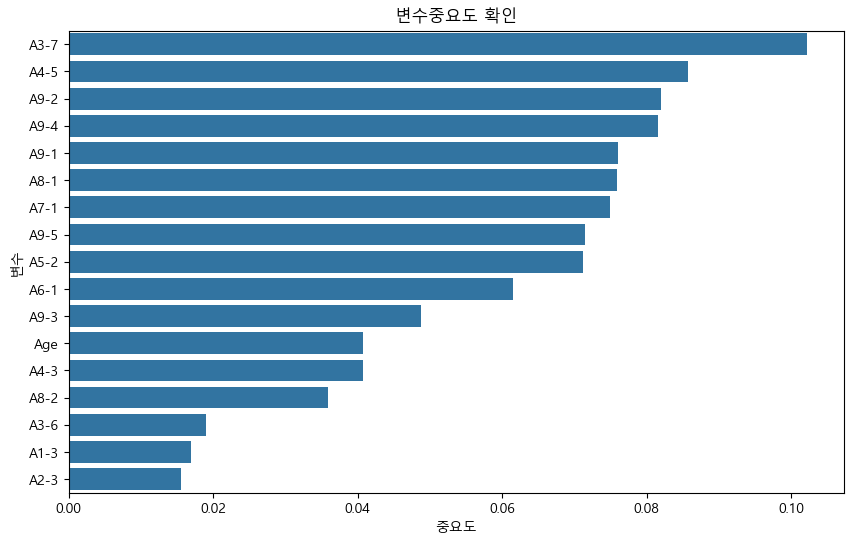

In [33]:
# 특성중요도 시각화
feature_importance = pd.Series(rf_a_model.feature_importances_, index = X_train_df.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('변수중요도 확인')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()


In [34]:
feature_importance

A3-7    0.102189
A4-5    0.085798
A9-2    0.082018
A9-4    0.081617
A9-1    0.076009
A8-1    0.075835
A7-1    0.074897
A9-5    0.071472
A5-2    0.071258
A6-1    0.061444
A9-3    0.048706
Age     0.040743
A4-3    0.040702
A8-2    0.035837
A3-6    0.019051
A1-3    0.016936
A2-3    0.015489
dtype: float64

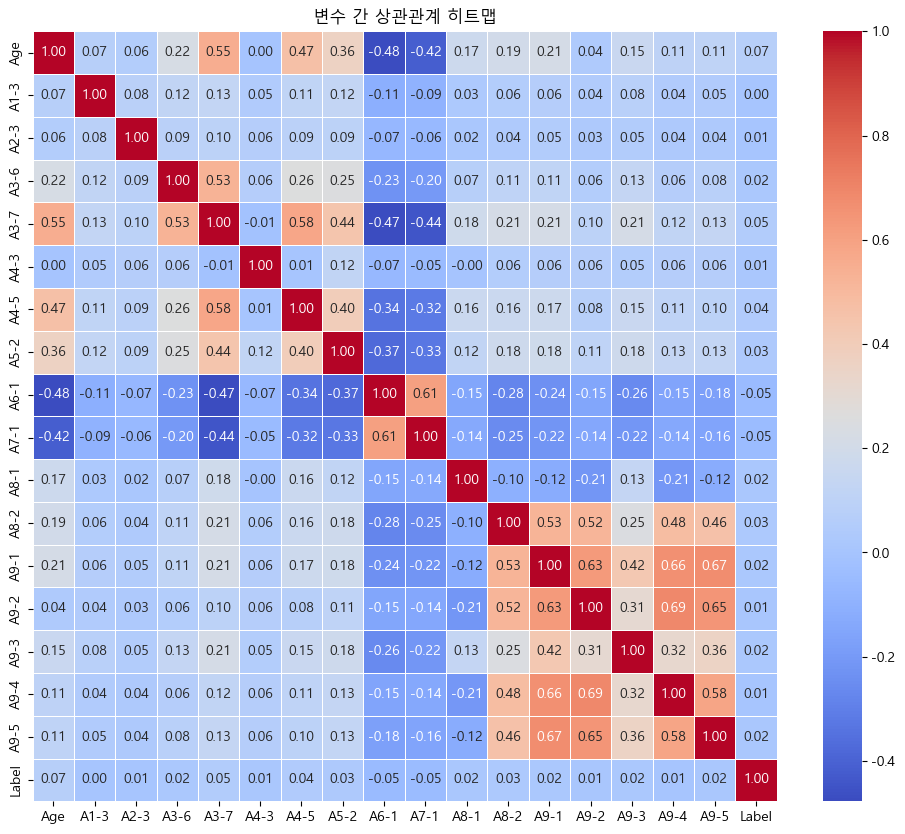

In [35]:
# 상관관계 확인
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1', 
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5', 'Label']
corr_matrix = train_a_set[column].corr()

plt.figure(figsize = (12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap = 'coolwarm',
    fmt = '.2f',
    linewidths=.5
)
plt.title('변수 간 상관관계 히트맵')
plt.show()


In [36]:
# 다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
numeric_features = train_a_set[column].select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data['feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

feature        VIF
6     A4-5  67.508523
4     A3-7  42.375935
0      Age  26.720384
8     A6-1  19.849710
9     A7-1  15.060327
13    A9-2   7.354342
7     A5-2   6.853604
12    A9-1   6.082420
15    A9-4   5.859456
16    A9-5   4.736142
10    A8-1   3.382300
11    A8-2   2.996086
14    A9-3   1.836438
3     A3-6   1.530607
5     A4-3   1.448621
2     A2-3   1.094028
1     A1-3   1.085655
17   Label   1.029821

#### (2) B자격검사

In [37]:
train_b_set['Age'] = train_b_set['Age'].apply(convert_age_to_numeric)

In [38]:
# 분석에 불필요한 변수 제거
X_train_df = train_b_set[['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 'B5-2', 'B6',
                          'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5', 'B10-6']]
y_train_df = train_b_set['Label']

In [39]:
# RandomForest를 활용한 특성 중요도 확인
rf_b_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_b_model.fit(X_train_df, y_train_df)

RandomForestClassifier(random_state=42)

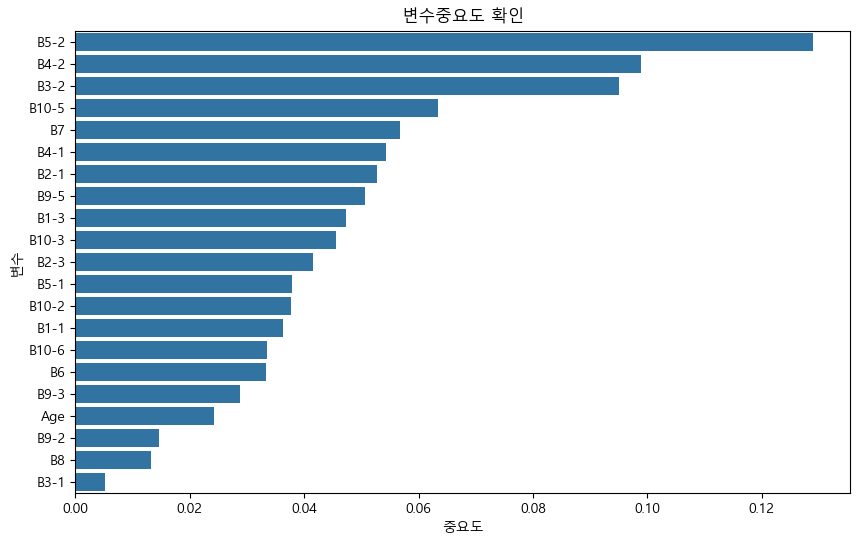

In [40]:
# 특성중요도 시각화
feature_importance = pd.Series(rf_b_model.feature_importances_, index = X_train_df.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('변수중요도 확인')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()


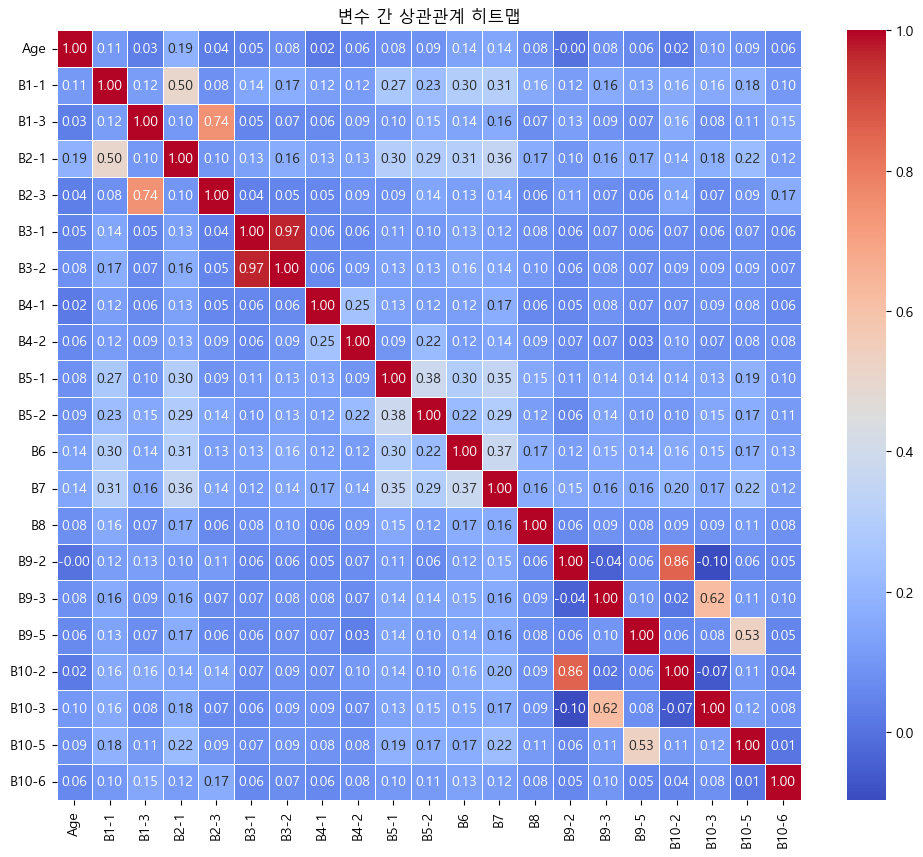

In [41]:
# 상관관계 확인
column = ['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 'B5-2', 'B6',
            'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5', 'B10-6']
corr_matrix = train_b_set[column].corr()

plt.figure(figsize = (12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap = 'coolwarm',
    fmt = '.2f',
    linewidths=.5
)
plt.title('변수 간 상관관계 히트맵')
plt.show()

In [42]:
# 다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
numeric_features = train_b_set[column].select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data['feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

feature        VIF
6     B3-2  53.277476
0      Age  52.317284
8     B4-2  22.828225
4     B2-3  20.167842
2     B1-3  19.294030
5     B3-1  16.988942
10    B5-2  16.380193
17   B10-2   5.185054
14    B9-2   4.305469
12      B7   4.051074
3     B2-1   2.678787
19   B10-5   2.441646
18   B10-3   2.279116
16    B9-5   2.109459
9     B5-1   1.952467
1     B1-1   1.914284
15    B9-3   1.858390
11      B6   1.713544
7     B4-1   1.331856
20   B10-6   1.220436
13      B8   1.207277

### 마) 로지스틱 Test

#### (1) Test1
- 가장 기본적인 테스트 수행결과 : 0, 1의 데이터 불균형으로 정확도는 97%이나 1에대해 전혀 예측을 못하는 모델

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.pipeline import make_pipeline


In [44]:
# A(신규자격) 로지스틱 회귀분석(base model)
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1',
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
X = train_a_set[column]
y = train_a_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)


In [45]:
np.unique(y_train, return_counts=True)
# 0에 비해 1의 데이터가 터무니 없이 부족(데이터 불균형)

(array([0, 1], dtype=int64), array([442782,  10284], dtype=int64))

In [46]:
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습
logic_model = LogisticRegression(C = 1.0, solver='saga', max_iter=1000, penalty='l2', random_state=42)
logic_model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])
print(f'Accuracy : {accuracy:.4f}')
print("confusion_matrix : \n", conf_matrix)
print("classification_report : \n", class_report)
print(f"roc_auc_score : {roc_auc:.4f}")


Accuracy : 0.9773
confusion_matrix : 
 [[189764      0]
 [  4408      0]]
classification_report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    189764
           1       0.00      0.00      0.00      4408

    accuracy                           0.98    194172
   macro avg       0.49      0.50      0.49    194172
weighted avg       0.96      0.98      0.97    194172

roc_auc_score : 0.6564


c:\Users\cvcv6\anaconda3\envs\daycon\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cvcv6\anaconda3\envs\daycon\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cvcv6\anaconda3\envs\daycon\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Test2
- class_weight='balanced' 적용으로 1을 예측하기는 시작했지만, 기준이 낮아지면서 0도 1로 예측하는 비율이 많아짐

In [47]:
# class_weight 파라미터 사용

# A(신규자격)
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1',
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
X = train_a_set[column]
y = train_a_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습(class_weight)
logic_model = LogisticRegression(C = 1.0, 
                                 solver='saga', 
                                 max_iter=1000, 
                                 penalty='l2', 
                                 class_weight='balanced',
                                 random_state=42)
logic_model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])
print(f'Accuracy : {accuracy:.4f}')
print("confusion_matrix : \n", conf_matrix)
print("classification_report : \n", class_report)
print(f"roc_auc_score : {roc_auc:.4f}")

Accuracy : 0.6013
confusion_matrix : 
 [[113921  75843]
 [  1565   2843]]
classification_report : 
               precision    recall  f1-score   support

           0       0.99      0.60      0.75    189764
           1       0.04      0.64      0.07      4408

    accuracy                           0.60    194172
   macro avg       0.51      0.62      0.41    194172
weighted avg       0.96      0.60      0.73    194172

roc_auc_score : 0.6548


#### Test3
- 

In [48]:
# 필요한 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
# imbalanced-learn 라이브러리 설치가 필요할 수 있습니다: pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
import joblib

In [49]:
# B(자격유지)
# Assuming train_a_set, train_test_split, StandardScaler, etc. are defined and imported
column = ['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 
          'B5-2', 'B6', 'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5',
          'B10-6']
X = train_b_set[column]
y = train_b_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화 (언더샘플링 전에 수행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 언더샘플링 적용 / RandomUnderSampler 사용
# This is correctly applied only to the training data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# --- CORRECTED CODE ---
# 로지스틱 회귀 모델 학습
logic_model = LogisticRegression(C = 0.01, 
                                 solver='saga', 
                                 max_iter=1000, 
                                 penalty='l2', 
                                 random_state=42,
                                 n_jobs=-1) # Added n_jobs for faster training
logic_model.fit(X_train_resampled, y_train_resampled)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)
pred_proba = logic_model.predict_proba(X_test_scaled)[:, 1]

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])

# 모델 및 스케일러 저장
MODEL_DIR = "./model"
os.makedirs(MODEL_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR, "logistic_model_B.pkl")
joblib.dump(logic_model, model_path)
print(f"✅ Model saved to: {model_path}")

scaler_path = os.path.join(MODEL_DIR, "scaler_B.pkl")
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved to: {scaler_path}")

print(f'Accuracy : {accuracy:.4f}')
print("Confusion Matrix : \n", conf_matrix)
print("Classification Report : \n", class_report)
print(f"ROC AUC Score : {roc_auc:.4f}")

✅ Model saved to: ./model\logistic_model_B.pkl
✅ Scaler saved to: ./model\scaler_B.pkl
Accuracy : 0.6142
Confusion Matrix : 
 [[53061 32417]
 [ 2016  1760]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.62      0.76     85478
           1       0.05      0.47      0.09      3776

    accuracy                           0.61     89254
   macro avg       0.51      0.54      0.42     89254
weighted avg       0.92      0.61      0.73     89254

ROC AUC Score : 0.5590


### ※ 평가체계

In [50]:
# 평가체계 준용
from evaluation import auc_brier_ece

answer_df = pd.DataFrame({
    'ID' : y_test.index,
    'Label' : y_test.values
})

submission_df = pd.DataFrame({
    'ID' : y_test.index,
    'Label' : pred_proba
})

try :
    combinded_score = auc_brier_ece(answer_df, submission_df)
    print(f"모델 최종 평가점수 : {combinded_score:.4f}")   
except ValueError as e:
    print(f"평가 중 오류 발생 : {e}")

모델 최종 평가점수 : 0.3959


In [51]:
# A(신규자격)
# Assuming train_a_set, train_test_split, StandardScaler, etc. are defined and imported
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1',
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
X = train_a_set[column]
y = train_a_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화 (언더샘플링 전에 수행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 언더샘플링 적용 / RandomUnderSampler 사용
# This is correctly applied only to the training data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# --- CORRECTED CODE ---
# 로지스틱 회귀 모델 학습
logic_model = LogisticRegression(C = 0.01, 
                                 solver='saga', 
                                 max_iter=1000, 
                                 penalty='l2', 
                                 random_state=42,
                                 n_jobs=-1) # Added n_jobs for faster training
logic_model.fit(X_train_resampled, y_train_resampled)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)
pred_proba = logic_model.predict_proba(X_test_scaled)[:, 1]

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])

# 모델 및 스케일러 저장
MODEL_DIR = "./model"
os.makedirs(MODEL_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR, "logistic_model_A.pkl")
joblib.dump(logic_model, model_path)
print(f"✅ Model saved to: {model_path}")

scaler_path = os.path.join(MODEL_DIR, "scaler_A.pkl")
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved to: {scaler_path}")

print(f'Accuracy : {accuracy:.4f}')
print("Confusion Matrix : \n", conf_matrix)
print("Classification Report : \n", class_report)
print(f"ROC AUC Score : {roc_auc:.4f}")

✅ Model saved to: ./model\logistic_model_A.pkl
✅ Scaler saved to: ./model\scaler_A.pkl
Accuracy : 0.6003
Confusion Matrix : 
 [[113692  76072]
 [  1544   2864]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.60      0.75    189764
           1       0.04      0.65      0.07      4408

    accuracy                           0.60    194172
   macro avg       0.51      0.62      0.41    194172
weighted avg       0.97      0.60      0.73    194172

ROC AUC Score : 0.6551


### 바) LightGBM 

In [52]:
import lightgbm 
from lightgbm import LGBMClassifier

# LightGBM 모델 적용
# Assuming train_a_set, train_test_split, StandardScaler, etc. are defined and imported
column = ['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 
          'B5-2', 'B6', 'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5',
          'B10-6']
X = train_b_set[column]
y = train_b_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화 (언더샘플링 전에 수행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 언더샘플링 적용 / RandomUnderSampler 사용
# This is correctly applied only to the training data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# --- CORRECTED CODE ---
# lightgbm 회귀 모델 학습
logic_model = LGBMClassifier(objective='binary', 
                        metric = 'auc', 
                        boosting_type='gbdt',
                        random_state=42)   
logic_model.fit(X_train_resampled, y_train_resampled)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)
pred_proba = logic_model.predict_proba(X_test_scaled)[:, 1]

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])

# 모델 및 스케일러 저장
MODEL_DIR = "./model"
os.makedirs(MODEL_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR, "lgbm_model_B.pkl")
joblib.dump(logic_model, model_path)
print(f"✅ Model saved to: {model_path}")

scaler_path = os.path.join(MODEL_DIR, "scaler_B.pkl")
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved to: {scaler_path}")

print(f'Accuracy : {accuracy:.4f}')
print("Confusion Matrix : \n", conf_matrix)
print("Classification Report : \n", class_report)
print(f"ROC AUC Score : {roc_auc:.4f}")

[LightGBM] [Info] Number of positive: 8812, number of negative: 8812
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 17624, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
✅ Model saved to: ./model\lgbm_model_B.pkl
✅ Scaler saved to: ./model\scaler_B.pkl
Accuracy : 0.5663
Confusion Matrix : 
 [[48662 36816]
 [ 1897  1879]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.57      0.72     85478
           1       0.05      0.50      0.09      3776

    accuracy                           0.57     89254
   macro avg       0.51      0.53      0.40     89254
weighted avg       0.92      0.57      0.69     

In [53]:
# 평가체계 준용
from evaluation import auc_brier_ece

answer_df = pd.DataFrame({
    'ID' : y_test.index,
    'Label' : y_test.values
})

submission_df = pd.DataFrame({
    'ID' : y_test.index,
    'Label' : pred_proba
})

try :
    combinded_score = auc_brier_ece(answer_df, submission_df)
    print(f"모델 최종 평가점수 : {combinded_score:.4f}")   
except ValueError as e:
    print(f"평가 중 오류 발생 : {e}")

모델 최종 평가점수 : 0.4046


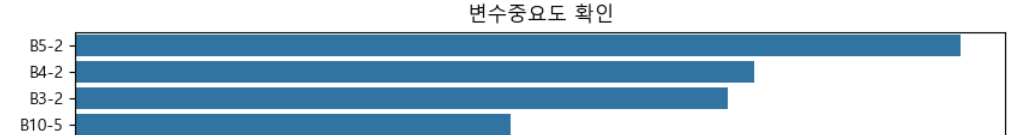

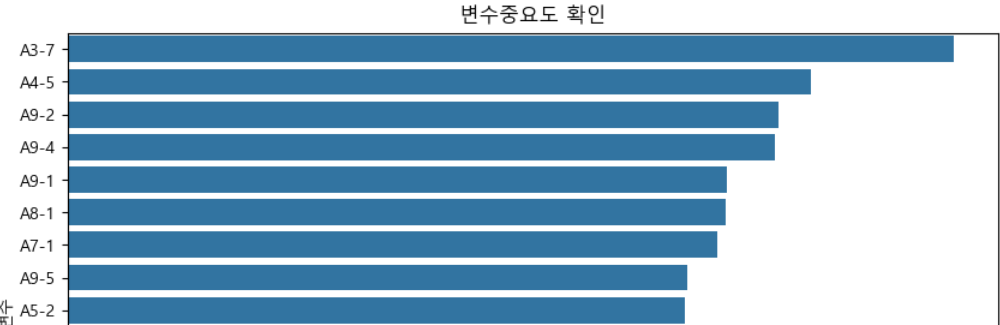

In [60]:
train_a_set

Test_id Test  ... A9-5  Label
0       0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...    A  ...    5      0
1       0xEE79150381336B7C24837F15D2594C20E5558414BC08...    A  ...    6      0
2       0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...    A  ...    2      0
3       0xFD69864A378D41EA703014FA36A9261D864477A61F2C...    A  ...   13      0
4       0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...    A  ...    5      0
...                                                   ...  ...  ...  ...    ...
647233  0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...    A  ...    5      0
647234  0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...    A  ...    5      0
647235  0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...    A  ...    0      0
647236  0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...    A  ...    3      0
647237  0x8B5BFFB6E91F922F6A582B3DA824652D463EFD47B359...    A  ...    4      0

[647238 rows x 22 columns]

In [ ]:
import lightgbm 
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from evaluation import auc_brier_ece, expected_calibration_error

# column = ['A3-7', 'A4-5', 'A9-2', 'A9-4', 'A9-1', 'A8-1', 'A7-1', 'A9-5', 'A5-2']
X = train_a_set[column]
y = train_a_set['Label']

# k-fold 교차검증 훈련
N_splits = 5
skf = StratifiedKFold(n_splits=N_splits, shuffle=True, random_state = 42)

# 예측값 저장할 배열 초기화
oof_preds = np.zeros(len(X)) 
oof_labels = np.zeros(len(X))

# 모델만 저장
MODEL_DIR = "./model"
os.makedirs(MODEL_DIR, exist_ok=True)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"================== 폴드 {fold + 1} 시작 ==================")
    
    # 현재 폴드의 훈련 및 검증 세트로 데이터 분할
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # 모델 정의
    num_neg = (y_train == 0).sum()
    num_pos = (y_train == 1).sum()
    scale_pos_weight_value = num_neg / num_pos
    
    logic_model = LGBMClassifier(objective='binary', 
                            metric = 'auc', 
                            boosting_type='gbdt',
                            random_state=42,
                            scale_pos_weight = scale_pos_weight_value)   
    
    # 조기종료를 사용한 모델 훈련
    logic_model.fit(X_train_scaled, y_train,
                    eval_set = [(X_val_scaled, y_val)],
                    callbacks=[lightgbm.early_stopping(100, verbose=False)])

    # 전체 평가를 위한 out-of-fold 예측값과 실제 레이블 저장
    val_preds = logic_model.predict_proba(X_val_scaled)[:, 1]
    oof_preds[val_idx] = val_preds
    oof_labels[val_idx] = y_val
    
    # 현재 폴드의 모델 저장 
    model_path = os.path.join(MODEL_DIR, f"lgbm_model_A_fold{fold}.pkl")
    joblib.dump(logic_model, model_path)
    print(f"✅ 폴드 {fold + 1} 모델 저장 완료: {model_path}")

# oof 예측을 사용한 전체 모델 평가
print("\n======= 전체 oof 평가=========")
# 분류 지표를 위해 oof_labels를 정수형으로 변환
oof_labels_int = oof_labels.astype(int)
# 확률 0.5를 기준으로 이진 예측값 생성
oof_binary_preds = (oof_preds >= 0.5).astype(int)

accuracy = accuracy_score(oof_labels_int, oof_binary_preds)
conf_matrix = confusion_matrix(oof_labels_int, oof_binary_preds)
class_report = classification_report(oof_labels_int, oof_binary_preds)
roc_auc = roc_auc_score(oof_labels_int, oof_preds)

print(f'전체 OOF 정확도 (Accuracy) : {accuracy:.4f}')
print("전체 OOF 혼동 행렬 (Confusion Matrix) : \n", conf_matrix)
print("전체 OOF 분류 보고서 (Classification Report) : \n", class_report)
print(f"전체 OOF ROC AUC 점수 : {roc_auc:.4f}")
    




================== 폴드 1 시작 ==================
[LightGBM] [Info] Number of positive: 11754, number of negative: 506036
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 517790, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.022700 -> initscore=-3.762414
[LightGBM] [Info] Start training from score -3.762414
✅ 폴드 1 모델 저장 완료: ./model\lgbm_model_A_fold0.pkl
================== 폴드 2 시작 ==================
[LightGBM] [Info] Number of positive: 11753, number of negative: 506037
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 517790, number of used features: 9
[Light

In [59]:
# oof 예측을 사용한 전체 모델 평가
print("\n======= 전체 oof 평가=========")
# 분류 지표를 위해 oof_labels를 정수형으로 변환
oof_labels = oof_labels.astype(int)
# 확률 0.5를 기준으로 이진 예측값 생성
oof_binary_preds = (oof_preds >= 0.5).astype(int)

accuracy = accuracy_score(oof_labels, oof_binary_preds)
conf_matrix = confusion_matrix(oof_labels, oof_binary_preds)
class_report = classification_report(oof_labels, oof_binary_preds)
roc_auc = roc_auc_score(oof_labels, oof_preds)

print(f'전체 OOF 정확도 (Accuracy) : {accuracy:.4f}')
print("전체 OOF 혼동 행렬 (Confusion Matrix) : \n", conf_matrix)
print("전체 OOF 분류 보고서 (Classification Report) : \n", class_report)
print(f"전체 OOF ROC AUC 점수 : {roc_auc:.4f}")

# evaluation 모듈을 사용한 평가

# answer_df : 실제 레이블
answer_df = pd.DataFrame({
    'ID' : X.index,
    'Label' : oof_labels_int
})

# submission_df : 예측 확률
submission_df = pd.DataFrame({
    'ID' : X.index,
    'Label' : oof_preds
})

# 평가
try : 
    combinded_score = auc_brier_ece(answer_df, submission_df)
    print(f"전체 oof combined 평가 점수 : {combinded_score:.4f}")
except Exception as e :
    print(f"평가 중 오류 발생 : {e}")


======= 전체 oof 평가=========
전체 OOF 정확도 (Accuracy) : 0.7214
전체 OOF 혼동 행렬 (Confusion Matrix) : 
 [[460913 171633]
 [  8710   5982]]
전체 OOF 분류 보고서 (Classification Report) : 
               precision    recall  f1-score   support

           0       0.98      0.73      0.84    632546
           1       0.03      0.41      0.06     14692

    accuracy                           0.72    647238
   macro avg       0.51      0.57      0.45    647238
weighted avg       0.96      0.72      0.82    647238

전체 OOF ROC AUC 점수 : 0.5774
전체 oof combined 평가 점수 : 0.3504
